In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/dataset.csv')

In [ ]:
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

I need to change 'Target' column into a datatype that is numerical

In [ ]:
df['Target']= df['Target'].map({'Graduate':1, 'Dropout':0})

In [ ]:
#The Target column should not have any nulls

df['Target'].isnull().sum()

794

In [ ]:
# According to the code on line [7] there are a lot of null values

df=df.dropna(subset='Target')

In [ ]:
#checking if there are still any nulls
df.isnull().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Nacionality,0
Mother's qualification,0
Father's qualification,0
Mother's occupation,0


In [ ]:
df['Target']= df['Target'].astype(int) #for the model, typically ML models are numerical
#hence I am chaning Target from being an object to being an interger

df['Target']= df['Target'].map({1:1, 0:0, 'Graduate':1, 'Dropout': 0}) #for clarity


In [ ]:
#checking whether the changes occured

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   int64  
 1   Application mode                                3630 non-null   int64  
 2   Application order                               3630 non-null   int64  
 3   Course                                          3630 non-null   int64  
 4   Daytime/evening attendance                      3630 non-null   int64  
 5   Previous qualification                          3630 non-null   int64  
 6   Nacionality                                     3630 non-null   int64  
 7   Mother's qualification                          3630 non-null   int64  
 8   Father's qualification                          3630 non-null   int64  
 9   Mother's occupation                           

# **EDA**

In [ ]:
#firstlt I need to get a visual representation of how the features in 'Target' are dispersed

import seaborn as sns
import matplotlib.pyplot as plt


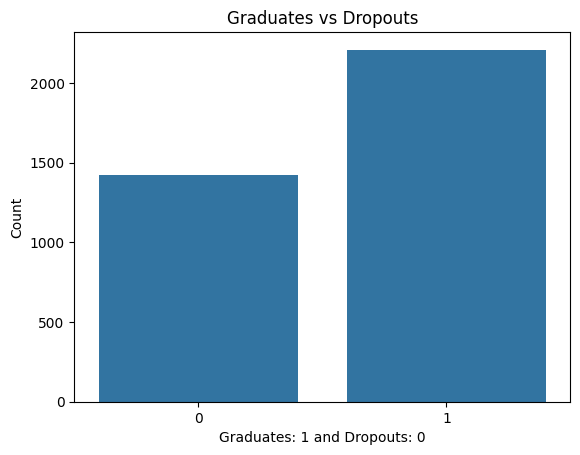

In [ ]:
sns.countplot(x=df['Target'])
plt.title('Graduates vs Dropouts')
plt.xlabel('Graduates: 1 and Dropouts: 0')
plt.ylabel('Count')
plt.show()

***What basically determines whether someone Graduates or Dropout's? I need to find strong influences through correlation***

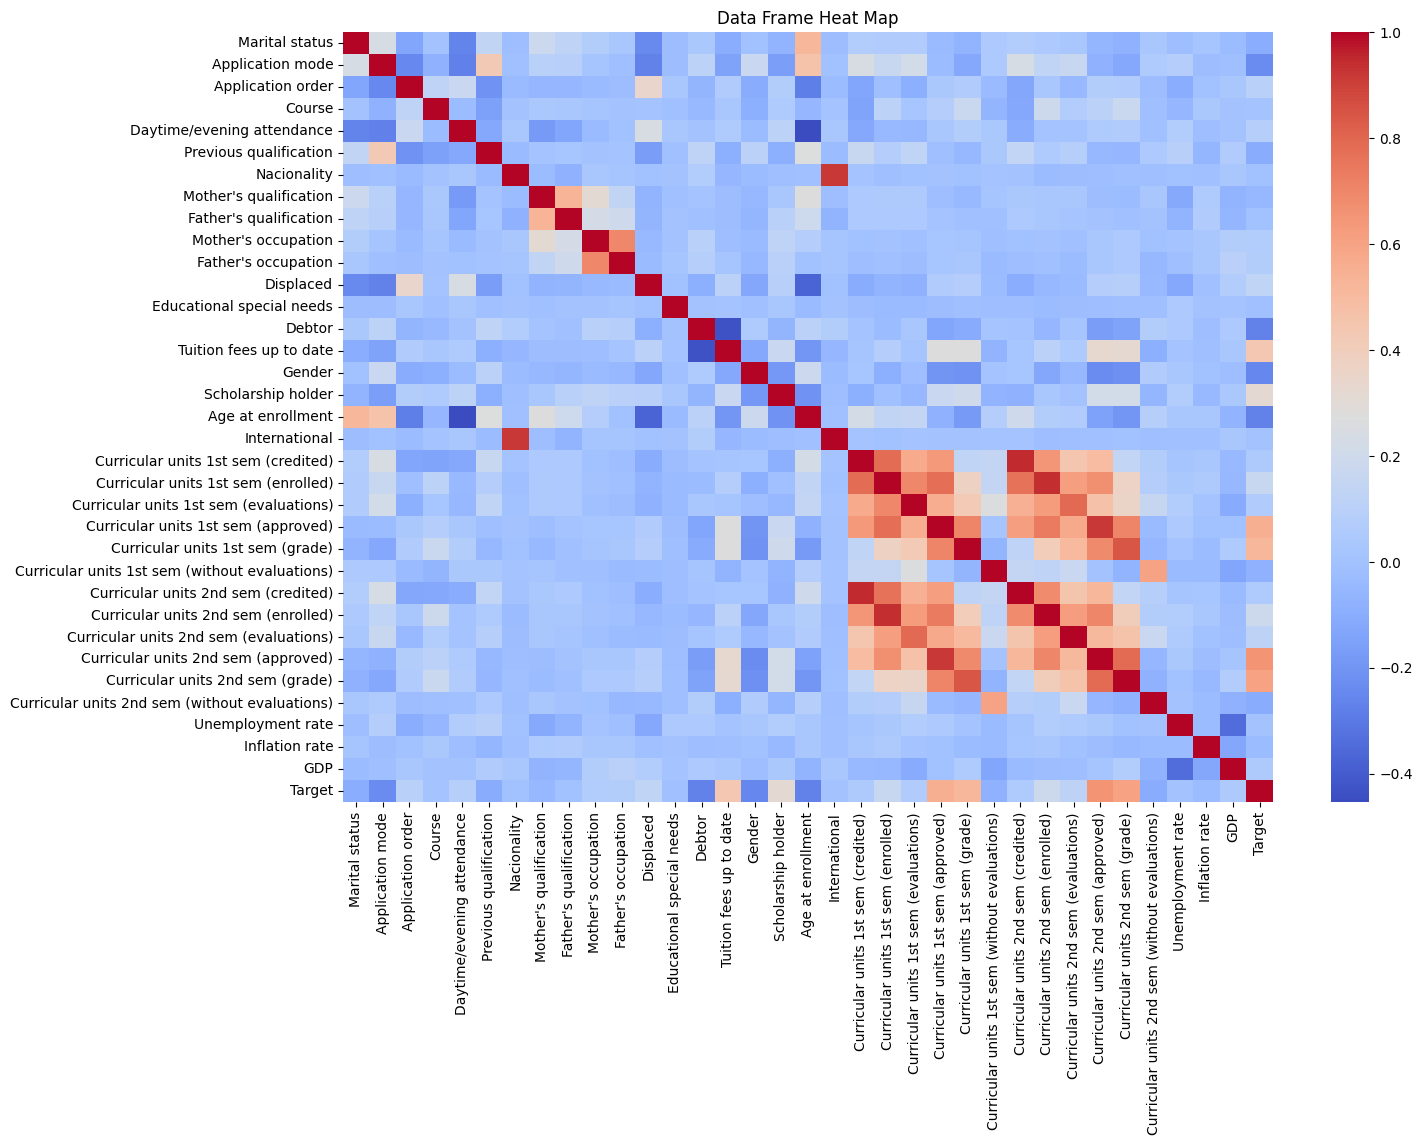

In [ ]:
import numpy as np

corrMatrix= df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corrMatrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Data Frame Heat Map')
plt.show()

In [ ]:
# I want to print the top 10 things that have a strong correlation to 'Target'

print(corrMatrix['Target'].sort_values(ascending=False).head(3))

Target                                 1.000000
Curricular units 2nd sem (approved)    0.653995
Curricular units 2nd sem (grade)       0.605350
Name: Target, dtype: float64


In [ ]:
# Okay I want to just test using 2 variables
#Basically I am staying that given the students' 2nd sem approval and 2nd sem grade, how likely are they to Graduate or Dropout

In [ ]:
selected_Features= ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']
# I am passing these as the "parameters"

In [ ]:
X= selected_Features
y= df['Target']

# Splitting and Training the Data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# I am passing these as the "parameters"
selected_Features = ['Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']

# X should be a DataFrame containing the selected features, not just the feature names
X = df[selected_Features]  # Select the data for the chosen features from the DataFrame
y = df['Target']

# Now, X and y will have consistent shapes, resolving the ValueError

In [ ]:
X_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Testing the model

y_pred= model.predict(x_test)

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print('/nClassification report: ', classification_report(y_test, y_pred))
print('/nConfusion matrix: ', confusion_matrix(y_test, y_pred))

Accuracy:  0.8471074380165289
/nClassification report:                precision    recall  f1-score   support

           0       0.83      0.75      0.79       277
           1       0.86      0.91      0.88       449

    accuracy                           0.85       726
   macro avg       0.84      0.83      0.83       726
weighted avg       0.85      0.85      0.85       726

/nConfusion matrix:  [[208  69]
 [ 42 407]]


In [ ]:
#Testing it on a new student

new_student= [5, 12]
new_student=np.array(new_student).reshape(1,-1)
prediction=model.predict(new_student)
print(prediction)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:

new_student= [1, 50]
new_student=np.array(new_student).reshape(1,-1)
prediction=model.predict(new_student)
print("Prediction: ", 'Graduate' if prediction[0]==1 else 'Dropout')

Prediction:  Dropout


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Saving my model**

In [ ]:
import joblib
from google.colab import files


In [ ]:
joblib.dump(model, 'student_model.pkl')
files.download('student_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>